# Video: Plotting Lines and Bars with Pandas

This video covers the more generic plotting support in pandas with a focus on line and bar charts.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/main/data/abalone.tsv", sep="\t")
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Script:
* Let's look at plotting line and bar charts with pandas now.
* We will see some repetitions of issues that we saw for histograms, but we will be able to resolve them similarly for line and bar charts.
* Let's start with pandas's first take on plotting this data as lines.

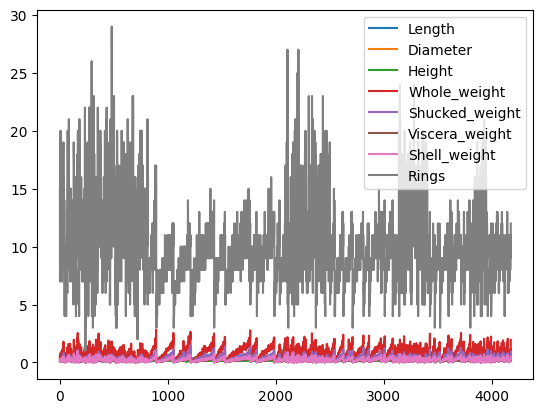

In [ ]:
_ = abalone.plot()

Script:
* The biggest issue here is that the x axis is the index of the data frame, and that is just the row number from the file.
* So the x axis is not meaningful to us, though it does look like it is not uniformly random.
* A secondary issue is that the rings column has a much higher range of values than the other columns, and makes the other column values look small and squeezed into the bottom of the chart.
* The same problem happens plotting a single column or series.

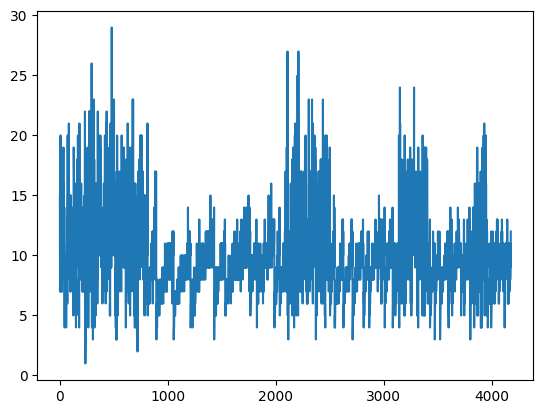

In [ ]:
_ = abalone["Rings"].plot()

Script:
* The root issue is not that pandas is bad at plotting, but we asked pandas to plot with a meaningless index.
* What do we actually want to see from this data?

## Grouping before Plotting

Possible answer:
* Trends in the dataset by a particular column
* e.g. average length/diameter/height by abalone rings

Script:
* When we are visualizing data, we are generally looking for patterns or trends in the data.
* Grouping and aggregating data lets us use another column as the x-axis without making a scatter plot and showing all the individual points.
* Let's look at an example.

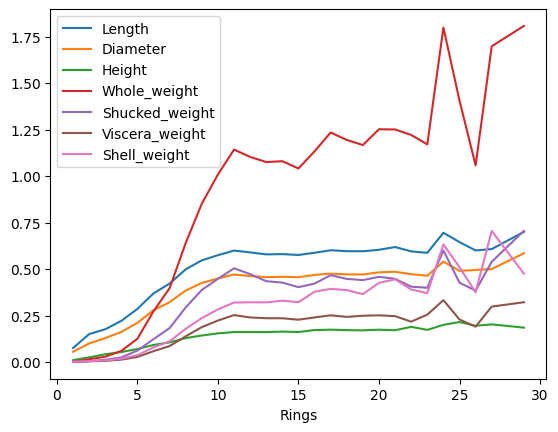

In [ ]:
_ = abalone.groupby("Rings").mean(numeric_only=True).plot()

Script:
* I chose the rings column because the dataset description said that rings was a good proxy for age, so probably most of these physical measurements would show meaningful trends from expected growth over time.
* And that appears to be the case, but it looks like abalone growth slows down significantly around 10 rings.
* Most of this chart is fairly smooth, but it gets pretty bumpy around 20 rings.
* What's going on there?
* A common explanation for bumpy charts when you are plotting a meaningful relation is low data.
* Let's check that.

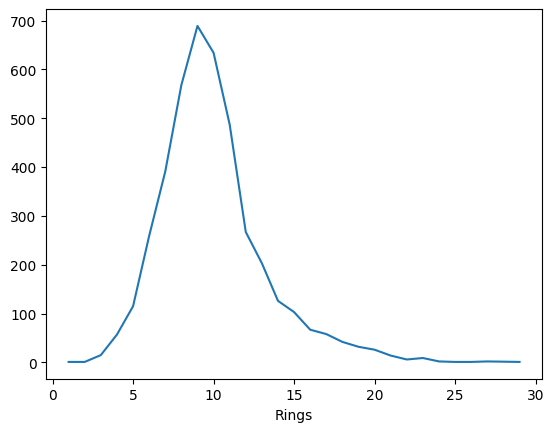

In [ ]:
_ = abalone.groupby("Rings").size().plot()

Script:
* Indeed there are not nearly as many abalone with more than 20 rings.
* There are not so many abalone with 1-3 rings either, but I suppose there are not so many giant baby abalone to add noise.
* One factor affecting the quality of these grouped charts is the number of distinct values in the x-axis.
* If the number of distinct values is close to the number of rows, many points plotted will not aggregate many data points and the chart will tend to be noisier.
* Let's check the number of distinct values for each column.

In [ ]:
abalone.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64

Script:
* There are only 3 distinct values for sex, so those probably are not very noisy unless the distribution is extremely skewed.
* On the other hand, the whole weight column has more than two thousand distinct values.
* The whole dataset only has about four thousand values, so many of these weights will only have one or two matching rows.
* That chart will be very noisy.

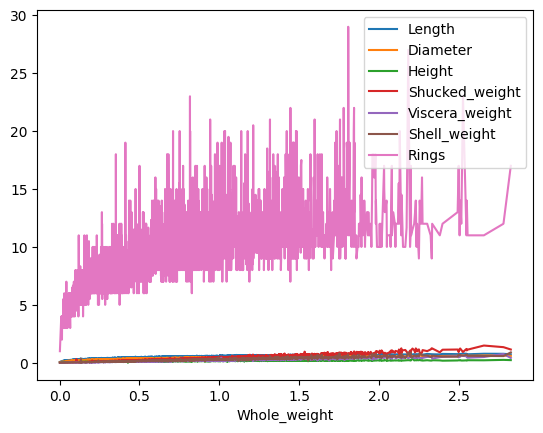

In [ ]:
_ = abalone.groupby("Whole_weight").mean(numeric_only=True).plot()

Script:
* That is pretty noisy as expected.
* We can improve this a bit by grouping by a rounded version of the column.

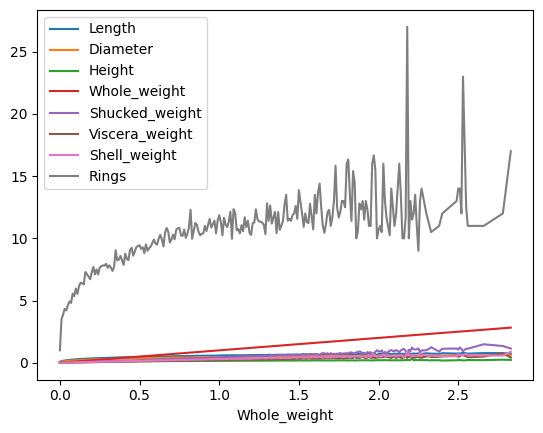

In [ ]:
_ = abalone.groupby(abalone["Whole_weight"].round(2)).mean(numeric_only=True).plot()

Script:
* That chart is less noisy, but did you notice the colors changed?
* Since I grouped on the rounded whole weight column, the original whole weight column stuck around after the group by.
* Previously, it became the index instead of a column.
* Now, you can see it as a straight line, but that is not so useful since the x axis is the same value but rounded.
* It just can't move much from that line, and ends up as a distraction.
* Let's take it out.

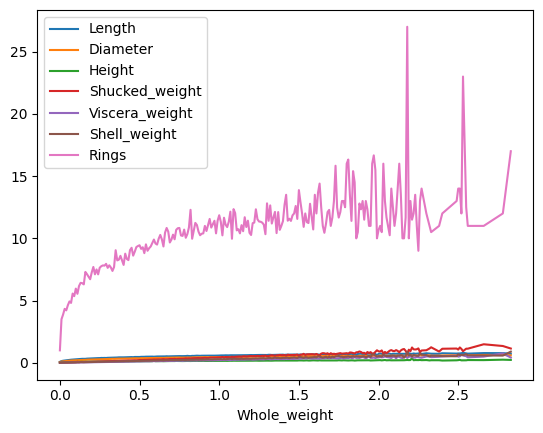

In [ ]:
_ = abalone.groupby(abalone["Whole_weight"].round(2)).mean(numeric_only=True).drop("Whole_weight", axis=1).plot()

Script:
* This chart is much more comparable to the previous noisy version.
* To the extent that we care about colors, it is almost always better for them to match between charts.
* One issue remains, the rings column is much bigger and makes it harder to see the trends in the other columns.
* Let's remove it too.

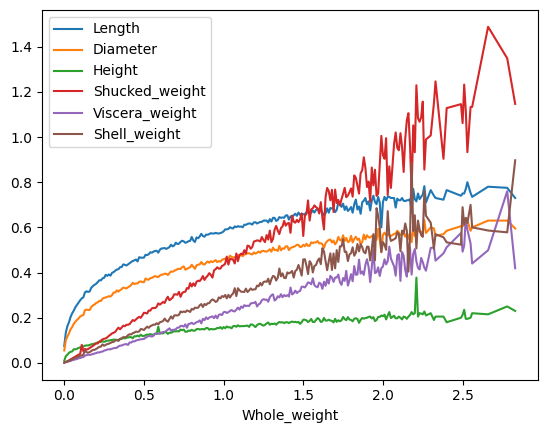

In [ ]:
_ = abalone.groupby(abalone["Whole_weight"].round(2)).mean(numeric_only=True).drop(["Rings", "Whole_weight"], axis=1).plot()

Script:
* Now we can see the shapes of these other curves, and we can see there are two kinds of trends at the column level.
* The shucked, viscera, and shell weight look close to straight lines.
* That makes sense since the x axis is the whole weight.
* The proportion of shell and viscera must be pretty flat over the life of an abalone.
* On the other hand, length, diameter, and height grow sublinearly.
* That is, they grow quickly early on, but slow down as the abalone gets heavier.
* The volume and thus weight of an abalone will be proportional to the product of those three measurements.
* So perhaps those three are proportional to the cube root of weight?
* You can dig on those relationships more if you are curious.
* The point that I'd like to make now is that it took some thought and a few rounds of chart tweaks to get the picture this clear.
* The original chart did not say much besides the rings numbers are bigger.
* With this chart, we can see two qualitatively different kinds of relationships between columns.


## Plotting Bar Charts with Pandas

* Similar mechanics to line charts...
* Bar charts tend to be more appropriate for volume data.


Script:
* Let's talk about bar charts next.
* Line and bar charts are in this video together because they have similar mechanics in the code.
* Bar charts tend to be more appropriate for volume data.
* With the abalone data, that would be the number of abalone meeting a criteria, not the size measurement.
* So when should we use a bar chart instead of a histogram?
* Bar charts for volume are histograms.
* One thing we get from making a bar chart is more control of the individual bars.
* We have to aggregate the data ourselves, but there is a bar for each row in that aggregate.
* No funny business fiddling with histogram boundaries to make them look right.
* So more work, but maybe a better product.
* Let's look at an example now.


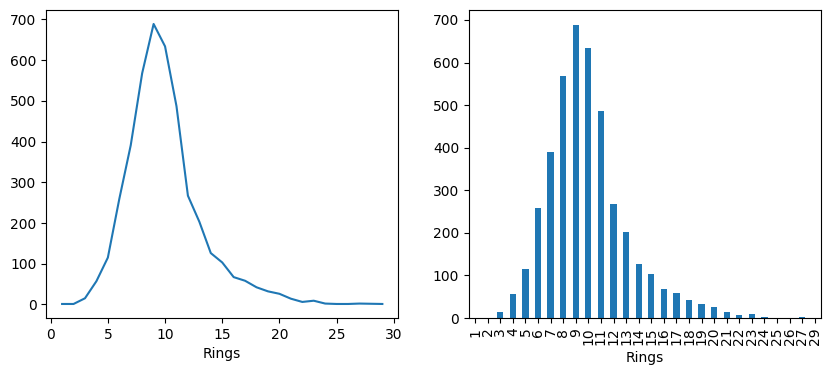

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
abalone.groupby("Rings").size().plot()
plt.subplot(1, 2, 2)
abalone.groupby("Rings").size().plot(kind="bar")
None

Script:
* The line chart on the left is a repetition from earlier in this video.
* I'll point out now the unsightly zero that does not line up with the bottom of the chart area.
* On the right is the same chart except `kind="bar"` was added to the plot call.
* This chart has all the bars starting from the bottom of the chart area.
* And it generally looks like a histogram, but each bar is centered on the number of rings shown.
* When we can make both line and bar charts, sometimes it is nice to combine them.

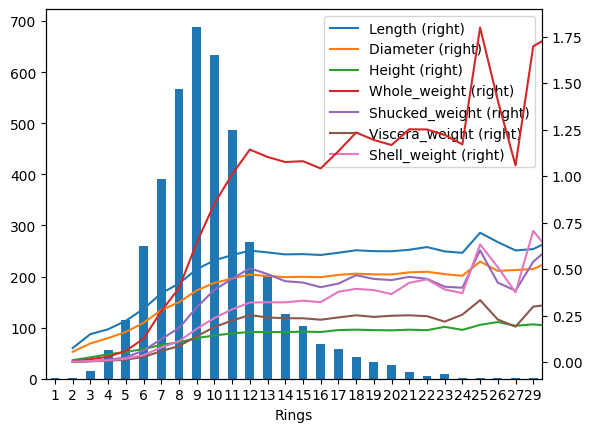

In [ ]:
ax1 = abalone.groupby("Rings").size().plot(kind="bar")
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=ax1, secondary_y=True)
None

Script:
* We will clean this chart up.
* One thing new here is that we are using the axis objects returned by the plot calls.
* So far, we have just ignored them and just tried not to print them out next to the chart.
* For these charts, I used the axis object returned by the first chart in the second plot call, so that they would be plotted together instead of separately.
* I also used an option `secondary_y` so that the line chart would use the right y axis and not smush them at the bottom like we saw on previous charts.
* This chart still is not great yet.
* Two things to fix are that the secondary y axis has zero floating above the bottom, and the top line is all over the legend.
* I will fix those together by changing the y range.

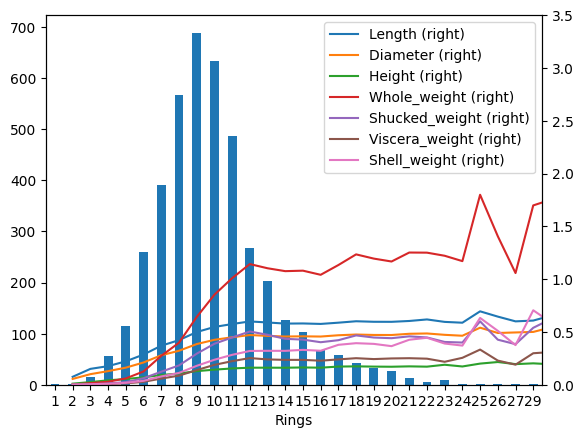

In [ ]:
ax1 = abalone.groupby("Rings").size().plot(kind="bar")
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=ax1, secondary_y=True)
ax2.set_ylim(0, 3.5)
None

Script:
* I set the y range to go artificially high, so the top line would be under the lgend.
* Now it looks ok.
* You can see the trends of each column based on the number of rings, and you can see where all the volume of data is.
* To my eye though, it's still a bit noisy, particularly where the lines overlap the bars.
* I usually prefer combining bars for volume with just one or two lines.
* Let's split that back out into two charts, one above the other.

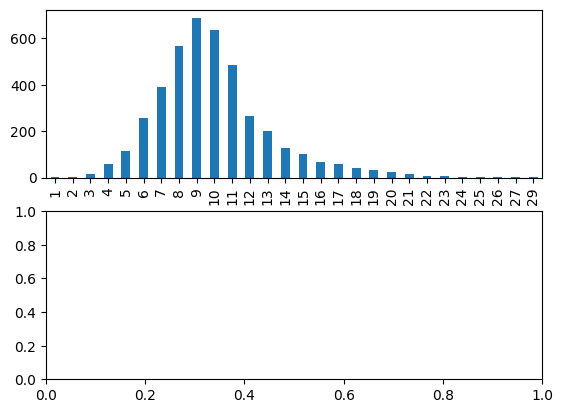

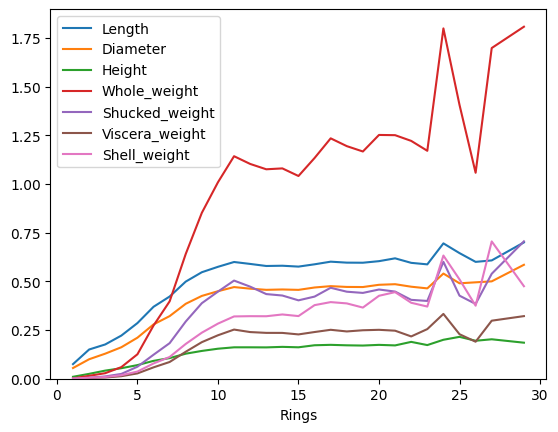

In [ ]:
plt.subplot(2, 1, 1)
abalone.groupby("Rings").size().plot(kind="bar")
plt.subplot(2, 1, 2)
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot()
ax2.set_ylim(0)
None

Script:
* That's not quite what I wanted.
* The line chart was supposed to be in that unused chart spot below the bar chart.
* This happened since pandas manages a lot of the Matplotlib details on its own, and in this case, it made a choice different from what I wanted.
* It made its own axis object separate outside the subplot structure.
* That can be overridden similarly to how we put the bar and line charts before.

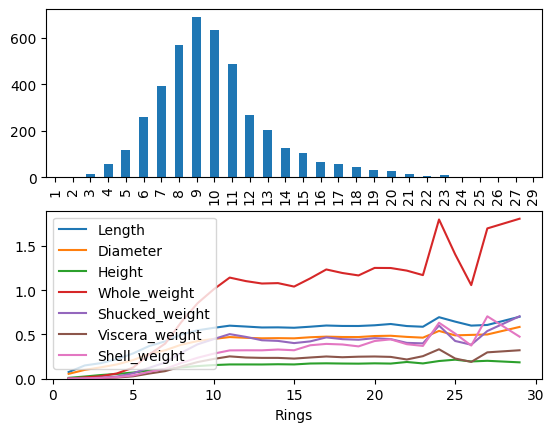

In [ ]:
plt.subplot(2, 1, 1)
abalone.groupby("Rings").size().plot(kind="bar")
plt.subplot(2, 1, 2)
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=plt.gca())
ax2.set_ylim(0)
None

Script:
* After specifying the second subplot, I used the `gca` function to get the current axis, referring to the second subplot, and passed that to the second plot call.
* That worked, but now the charts are cramped.
* That can be fixed by increasing the figure size.

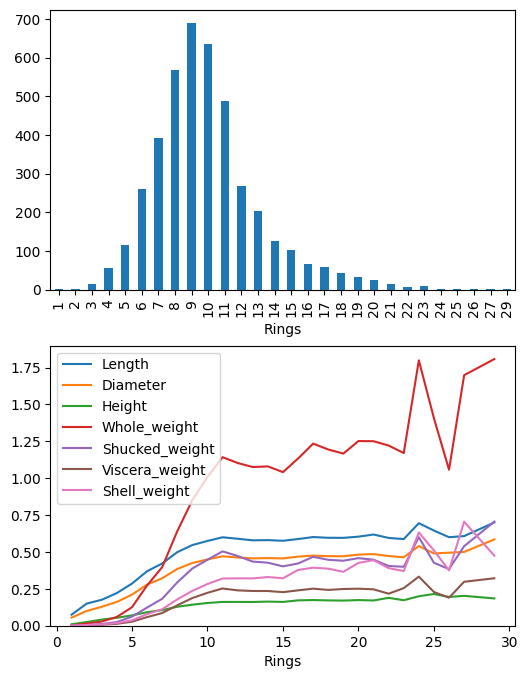

In [ ]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
abalone.groupby("Rings").size().plot(kind="bar")
plt.subplot(2, 1, 2)
ax2 = abalone.groupby("Rings").mean(numeric_only=True).plot(ax=plt.gca())
ax2.set_ylim(0)
None

Script:
* That looks like a decent pair of charts.
* There is a little bit of overlap with the legend, but it doesn't obscure the trends.
* And it is easy to see where the volume of data is on the left, and how the noisy lines on the right correspond to lower data ranges.